In [1]:
# Set the matplotlib magic. This line is specific to ipython notebooks.
%matplotlib inline
# %matplotlib notebook
# %matplotlib widget

# Import some useful module.
import time
from matplotlib import pyplot as plt
from IPython.display import HTML
import numpy as np
import math
from scipy.optimize import curve_fit

# Import the system module.
import mag_lev

In [2]:
# Format Plots
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150

# Change font
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [3]:
MAX_VOLTAGE = 10.0 # [V]
R = 2.41 # Coil Resistance [ohms]

## System Characterization
This section focuses on running experiments to understand the dynamics of the hall effect sensor, electromagnet circuit, and the permanent magnet

No magnet, no electromagnet - $$V_h = 2.5 V$$

In [4]:
sys_1 = mag_lev.MagLev()
sys_1.start_system()
sys_1.set_max_coil_voltage_magnitude(MAX_VOLTAGE)

Starting system...
System started


In [5]:
# Test to show relationship between magnet distance and hall voltage

time_list = []
V_h_list = []

#sys_1.remove_magnet()
time.sleep(1)

sample_t = 0.2 # Amount of time to take measurements over
distances = np.linspace(0, 0.1, 21) # 5 mm distances
idx = 0

start_t = time.time()
last_measurement_t = time.time()

sys_1.set_object_mass(3.0e-3)
sys_1.hold_magnet_at_distance(distances[0])

measurements = []
positions = []

while (idx+1 != len(distances)):
    if (time.time() - last_measurement_t > sample_t):
        # Save measurement from last distance test
        positions.append(distances[idx])
        measurements.append(sys_1.get_hall_voltage())
        
        idx += 1
        sys_1.hold_magnet_at_distance(distances[idx])
        last_measurement_t = time.time()
        
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_1.get_hall_voltage())

In [6]:
# Check this plot to make sure we've waited long enough for dynamics to settle
#plt.plot(time_list, V_h_list)

Text(0.5, 0, 'Magnet Position (m)')

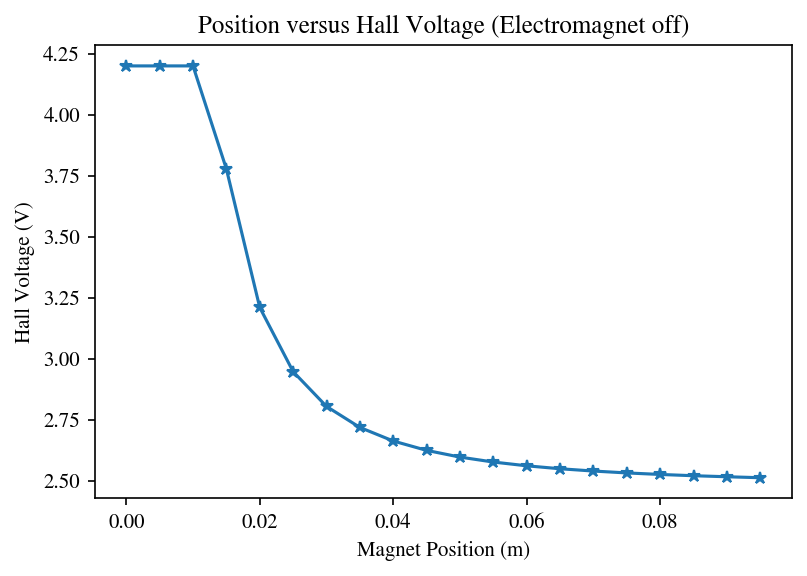

In [7]:
plt.plot(positions, measurements, '*-')
plt.title("Position versus Hall Voltage (Electromagnet off)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("Magnet Position (m)")

In [8]:
# Test to show relationship between electromagnet PWM and hall voltage

time_list = []
V_h_list = []

sys_1.remove_magnet()
time.sleep(1)

sample_t = 0.2 # Amount of time to take measurements over (to let dynamics "settle")
PWMs = np.linspace(0, 225, 25)
idx = 0

measurements_2 = []
PWM_list_2 = []

start_t = time.time()
last_measurement_t = time.time()

sys_1.set_amplifier_input(PWMs[0], sys_1.FORWARD)

while (idx+1 != len(PWMs)):
    if (time.time() - last_measurement_t > sample_t):
        # Save measurement from last PWM test
        measurements_2.append(sys_1.get_hall_voltage())
        PWM_list_2.append(PWMs[idx])
        
        idx += 1
        sys_1.set_amplifier_input(PWMs[idx], sys_1.FORWARD)
        last_measurement_t = time.time()
        
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_1.get_hall_voltage())

In [9]:
# Check this plot to make sure we've waited long enough for dynamics to settle
#plt.plot(time_list, V_h_list) 

Text(0.5, 0, 'PWM signal (0 - 255)')

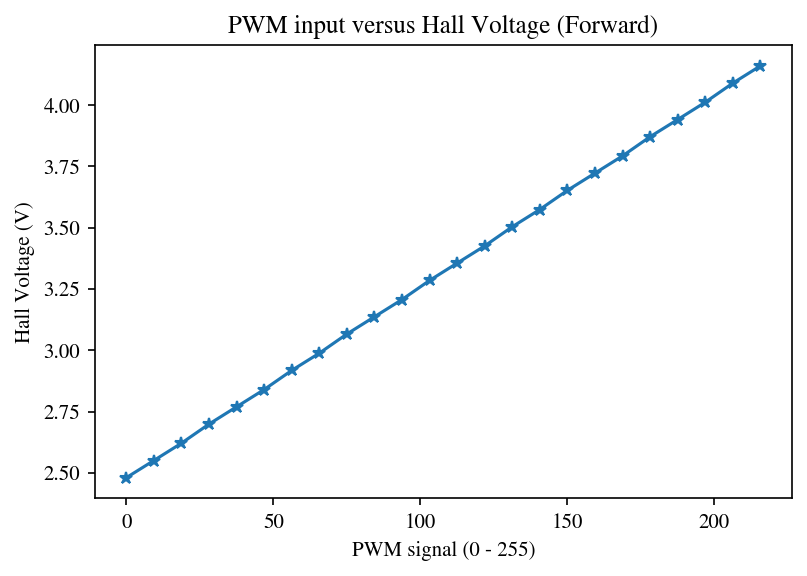

In [10]:
plt.plot(PWM_list_2, measurements_2, '*-')
plt.title("PWM input versus Hall Voltage (Forward)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("PWM signal (0 - 255)")

In [11]:
# Represents slope of PWM vs hall voltage
# This value is primarily for sanity checking and is not directly used
(measurements_2[-1] - measurements_2[0])/(PWM_list_2[-1] - PWM_list_2[0])

0.007788424456799827

In [12]:
# How do these stack together? Let's compute the position vs hall voltage graph again with the electromagnet on
# Using PWM 100 for testing
# PWM 100 corresponds with hall voltage of 3.25 with no magnet

time_list = []
V_h_list = []

sys_1.remove_magnet()
sys_1.set_amplifier_input(100, sys_1.FORWARD) # Just using mid-range PWM for testing
time.sleep(1)

sample_t = 0.2 # Amount of time to take measurements over
distances = np.linspace(0, 0.1, 21) # 1 cm distances
idx = 0

start_t = time.time()
last_measurement_t = time.time()

sys_1.set_object_mass(3.0e-3)
sys_1.hold_magnet_at_distance(distances[0])

measurements_3 = []
positions_3 = []

while (idx+1 != len(distances)):
    if (time.time() - last_measurement_t > sample_t):
        # Save measurement from last distance test
        positions_3.append(distances[idx])
        measurements_3.append(sys_1.get_hall_voltage())
        
        idx += 1
        sys_1.hold_magnet_at_distance(distances[idx])
        last_measurement_t = time.time()
        
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_1.get_hall_voltage())

You cannot remove a magnet that is not present.


In [13]:
# How do these stack together? Let's compute the position vs hall voltage graph again with the electromagnet on
# Using PWM 100 for testing
# PWM 100 corresponds with hall voltage of 3.25 with no magnet

time_list = []
V_h_list = []

sys_1.remove_magnet()
sys_1.set_amplifier_input(50, sys_1.FORWARD) # Just using mid-range PWM for testing
time.sleep(1)

sample_t = 0.2 # Amount of time to take measurements over
distances = np.linspace(0, 0.1, 21) # 1 cm distances
idx = 0

start_t = time.time()
last_measurement_t = time.time()

sys_1.set_object_mass(3.0e-3)
sys_1.hold_magnet_at_distance(distances[0])

measurements_4 = []
positions_4 = []

while (idx+1 != len(distances)):
    if (time.time() - last_measurement_t > sample_t):
        # Save measurement from last distance test
        positions_4.append(distances[idx])
        measurements_4.append(sys_1.get_hall_voltage())
        
        idx += 1
        sys_1.hold_magnet_at_distance(distances[idx])
        last_measurement_t = time.time()
        
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_1.get_hall_voltage())

In [14]:
# Check this plot to make sure we've waited long enough for dynamics to settle
# plt.plot(time_list, V_h_list) 

array([0.        , 0.        , 0.        , 0.42219427, 0.78111297,
       0.78107527, 0.78118088, 0.78101216, 0.78096717, 0.78098929,
       0.78108461, 0.78114538, 0.78107167, 0.78111412, 0.78100816,
       0.78102468, 0.78099556, 0.78087315, 0.78076038, 0.78104116])

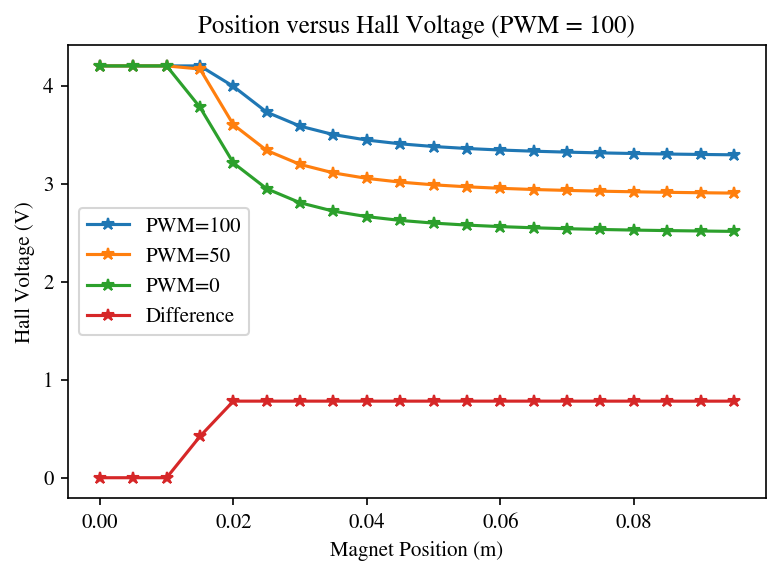

In [15]:
plt.plot(positions_3, measurements_3, '*-', label='PWM=100')
plt.plot(positions_4, measurements_4, '*-', label='PWM=50')
plt.plot(positions, measurements, '*-', label='PWM=0')
plt.plot(positions, 
         np.array(measurements_3)-np.array(measurements), "*-", label="Difference")
plt.title("Position versus Hall Voltage (PWM = 100)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("Magnet Position (m)")
plt.legend()

# TODO: Verify this is a pure sum relationship by consolidating results into one plot
np.array(measurements_3)-np.array(measurements)

In [16]:
sys_1.stop_system()

System stopped


### Conclusions
We don't actually need to worry about the precise value of B, since we know hall voltage is proportional to B (aka the B that results from a voltage of 3.5 volts is the same regardless of whether it came from the electromagnet or the permanent magnet)

From the final test, we can see that the position versus hall voltage graph simply shifted up based on the value of the electromagnet PWM (assuming the magnet's dynamics have settled) - in other words, "this is a pure sum relationship" between the electromagnet and permanent magnet's contribution.

This means we should be able to subtract out the effect of the electromagnet to get a clean position reading (especially after we model the electromagnet's inductance - the hall voltage seems directly proportional to the electromagnet's current)

**CORRECTION:** This relationship only holds true for magnet positions 0.02 or greater

Next step: determine relationship between PWM and current, write a function that computes position based on magnet current given the info seen here

## Sensor Calibration
This section focuses on running experiments to compute constants that weren't given, such as hall effect sensor coefficients, electromagnet inductance, and the permanent magnet B field coefficients

### Calibrating Inductance

Since the circuit's relationship between current and voltage can be modeled as a linear system whose transfer function can be written as 

$$\frac{I}{V} = \frac{1}{R + Ls}$$

We can compute the inductance by observing the electromagnet's time constant

For a first order system of the form 
$$\frac{k}{\tau s + 1}$$

$\tau$ represents the time constant. With this information, we can conclude that the time constant of our system should be 
$$\tau = \frac{L}{R}$$


To start, let's take some measurements of $V_h$ when the PWM is set to $100$

In [8]:
sys_3 = mag_lev.MagLev()
sys_3.start_system()
sys_3.set_max_coil_voltage_magnitude(MAX_VOLTAGE)

Starting system...
System started


In [9]:
time_list = []
V_h_list = []

sys_3.remove_magnet()
time.sleep(1)

start_t = time.time()

delay = 0.1

while (time.time() - start_t < 0.2):        
    if time.time() - start_t > delay: # Add in delay to ensure we actually start from '0'
        test_PWM = 100
        sys_3.set_amplifier_input(test_PWM, sys_3.FORWARD)
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_3.get_hall_voltage())

You cannot remove a magnet that is not present.


Since there's some distance between the measurements, let's extrapolate between the points with a best-fit line

We know that the time-domain response can be written as
$$
V_h = (V_{max} - V_{min})(1-e^{-t/\tau}) + V_{min}
$$

where 
- $V_{max}$ is the steady-state hall voltage for a given PWM command
- $V_{min}$ is the hall voltage when the PWM = $0$
- $\tau$ is the time constant, which is equal to $\frac{L}{R}$

Inverting this function gives us 
$$
-\tau \ln{(- \frac{V_h-V_{min}}{V_{max}-V_{min}} + 1)} = t
$$
which allows us to compute what the time constant is given the expected value for the hall voltage

In [10]:
V_max = max(V_h_list)
V_min = min(V_h_list)

time_list = np.array(time_list)
V_h_list = np.array(V_h_list)

In [20]:
# Get index of point closest to t=0.1 (delay)
# Compute differences
deltas = abs(time_list - delay) 

# Get closest index
idx = np.argmin(deltas)

# Only use data from t > 0.1
idx = idx

In [21]:
calibration_t = time_list[idx:] - delay
calibration_V_h = V_h_list[idx:]

def hallFuncPWM100(t, L):
    return (V_max - V_min)*(1-math.e**(-t*R/L)) + V_min

def inverseHallFuncPWM100(V_h, L):
    return -L/R * math.log(-(V_h - V_min)/(V_max - V_min) + 1)

In [22]:
# Only use points after t=0.1 for curve fitting
L, pcov = curve_fit(hallFuncPWM100, calibration_t, calibration_V_h)
L[0]

0.01643806314090495

In [23]:
# Expected value of V_h at time constant
V_h_tc = (1- 1/math.e) * (V_max - V_min) + V_min 

# Compute time constant
tc = inverseHallFuncPWM100(V_h_tc, L)

tc[0]

0.006820773087512425

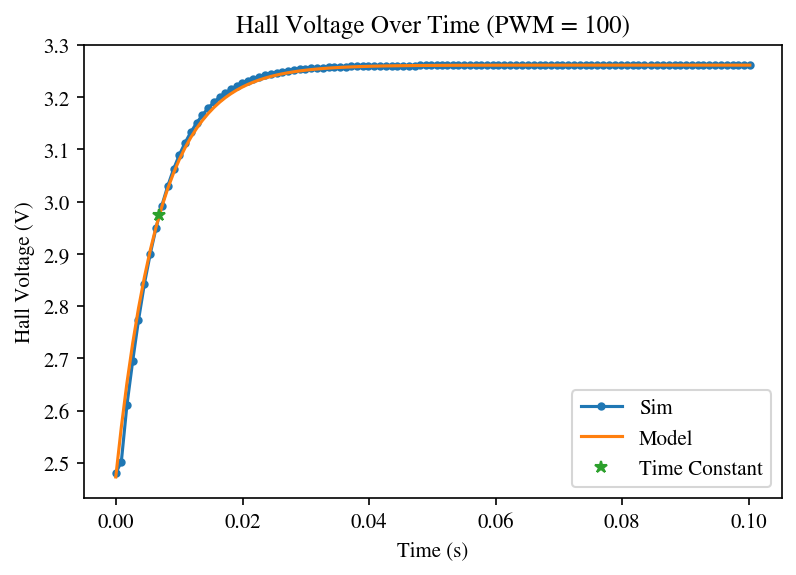

In [24]:
plt.plot(calibration_t, calibration_V_h, '.-', label="Sim")
plt.plot(calibration_t, hallFuncPWM100(calibration_t, *L), label="Model")
plt.plot(tc, V_h_tc, '*', label="Time Constant")
plt.title("Hall Voltage Over Time (PWM = 100)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("Time (s)")
plt.legend()

In [25]:
sys_3.stop_system()

System stopped


### Calibrating Hall Effect Sensor

Since it appears that electromagnet current is directly proportional to hall voltage, we can find a scaling constant to convert directly from hall voltage to current

$$
I = V_h * c
$$

We can do this as follows (assuming the system has already reached steady-state):
1. $V_e = \frac{PWM}{255} * V_{max}$
2. $I = \frac{V_e}{R}$
3. $c = \frac{I}{V_h}$

Note: This computes the hall voltage contribution from the electromagnet - it should be added to $2.5V$ to get the actual hall voltage value

In [29]:
# # Compute scaling constant between electromagnet current and hall voltage
# Note: This computation doesn't yield a great scaling value - it works, but is rather off

# # Compute electromagnet voltage
# V_e = test_PWM/255 * MAX_VOLTAGE

# # Compute steady-state current 
# I = V_e / R

# # Compute scaling constant
# # TODO: use average here to reduce impact of noise
# c_I_to_V_h = I / V_h_list[-1]

# c_I_to_V_h

### Calibrating Hall Effect Sensor - V2

From above, we're finding that 100 PWM is pretty strongly correlated with a hall voltage shift of 0.781. Let's use this number to compute `c_I_to_V_h` instead

In [26]:
PWM_delta = 100

# Compute electromagnet voltage
V_e_delta = PWM_delta/255 * MAX_VOLTAGE

# Compute steady-state current 
I_delta = V_e_delta / R

# Compute scaling constant
# TODO: use average here to reduce impact of noise
c_I_to_V_h = 0.781 / I_delta

c_I_to_V_h

0.47996355000000007

This analysis created the `currentToHallVoltage` function below

### Calibrating Permanent Magnet
Now that we have the electromagnet's contribution to the hall voltage, we can create a function that allows the hall effect sensor to act like a position sensor

We know that the magnet's B field is directly proportional to the hall effect sensor's voltage, so let's start with the equation for a permanent magnet B field 
$$
\mathbf{B}(\mathbf{r}) = 
    \frac{\mu_0}{4 \pi} 
    \frac{3 \mathbf{\hat{r}} (\mathbf{\hat{r}} \cdot \mathbf{m}) - \mathbf{m}}{|r|^3}
$$
(This equation models the magnet as a magnetic dipole moment, which doesn’t consider the shape of the magnet at all. We assume that $\hat{r}$ is perpendicular to the magnetic dipole moment $m$) 

Reference: https://en.wikipedia.org/wiki/Magnetic_moment#Magnetic_pole_model

If we assume $\mathbf{m}$ is a constant and that we have the magnetic field perfectly aligned, we can separate all of the constants out as follows:

$$
\mathbf{B}(\mathbf{r}) = 
    \frac{\mu_0 (2\mathbf{m})}{4 \pi} 
    \frac{1}{|r|^3}
$$

Which can be equivalently written as
$$
\mathbf{B}(\mathbf{r}) = 
    c
    \frac{1}{|r|^3}
$$

Where $c$ is a constant representing $\frac{\mu_0 (2\mathbf{m})}{4 \pi} $

In [27]:
sys_5 = mag_lev.MagLev()
sys_5.start_system()
sys_5.set_max_coil_voltage_magnitude(MAX_VOLTAGE)

Starting system...
System started


In [28]:
# Test to show relationship between magnet distance and hall voltage

time_list = []
V_h_list = []

sys_5.remove_magnet()
time.sleep(1)

sample_t = 0.2 # Amount of time to take measurements over
distances = np.linspace(0, 0.1, 21) # 1 cm distances
idx = 0

start_t = time.time()
last_measurement_t = time.time()

sys_5.set_object_mass(3.0e-3)
sys_5.hold_magnet_at_distance(distances[0])

measurements = []
positions = []

while (idx+1 != len(distances)):
    if (time.time() - last_measurement_t > sample_t):
        # Save measurement from last distance test
        positions.append(distances[idx])
        measurements.append(sys_5.get_hall_voltage())
        
        idx += 1
        sys_5.hold_magnet_at_distance(distances[idx])
        last_measurement_t = time.time()
        
    time_list.append(time.time() - start_t)
    V_h_list.append(sys_5.get_hall_voltage())

You cannot remove a magnet that is not present.


In [29]:
sys_5.stop_system()

System stopped


In [30]:
def posToVolt(x, a, b, c):
    return a/((x + c)**3) + b

def voltToPos(x, a, b, c):
    return (a/(x - b))**(1/3) - c

In [31]:
hall_params, pcov = curve_fit(posToVolt, positions[5:], measurements[5:])
hall_params # Note that b looks approximately equal to 2.5, which is our offset

array([2.59587881e-05, 2.49437906e+00, 1.36122106e-02])

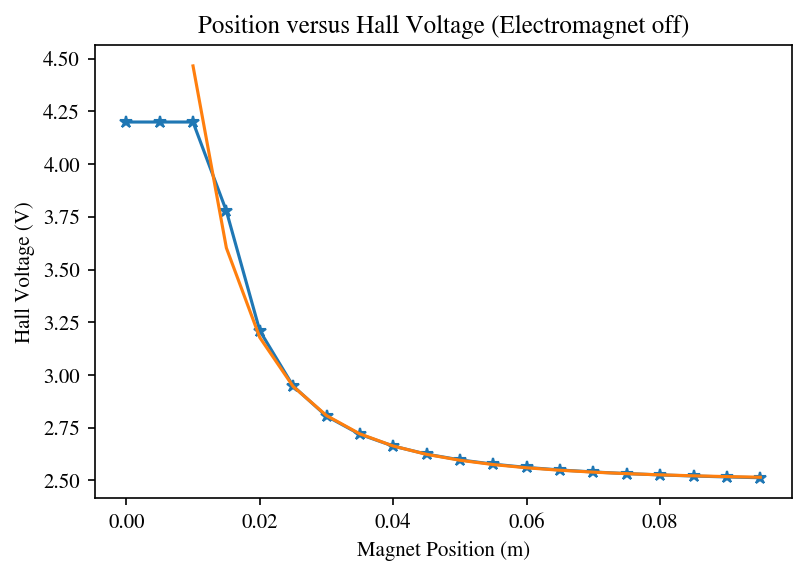

In [32]:
plt.plot(positions, measurements, '*-')
plt.title("Position versus Hall Voltage (Electromagnet off)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("Magnet Position (m)")

plt.plot(positions[2:], posToVolt(np.array(positions[2:]), *hall_params))

Text(0, 0.5, 'Magnet Position (m)')

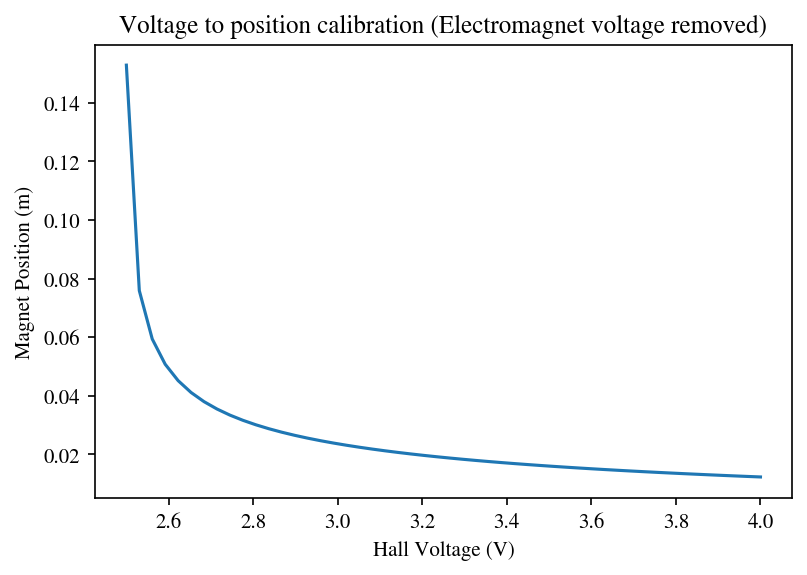

In [33]:
# Voltage to position calibration graph

xs = np.linspace(2.5,4)
plt.plot(xs, voltToPos(xs,  *hall_params))
plt.title("Voltage to position calibration (Electromagnet voltage removed)")
plt.xlabel("Hall Voltage (V)")
plt.ylabel("Magnet Position (m)")

Now that we have a position-to-voltage calibration function in the form 
$$
\frac{a}{(y + c)^3} + b = V_h
$$

which can be inverted to create a voltage-to-position function in the form
$$
\sqrt[3]{\frac{a}{V_h -b}} - c = y
$$

where
- $a,b,c$: lumped parameter constants
- $y$: magnet position
- $V_h$: Hall voltage

This analysis created the `convertToDistance` function below

In [46]:
# Testing convertToDistance

sys_4 = mag_lev.MagLev()
sys_4.start_system()
sys_4.set_max_coil_voltage_magnitude(MAX_VOLTAGE)
sys_4.set_object_mass(3.0e-3)

Starting system...
System started


In [47]:
test_PWM = 150
test_distance = 0.04

sys_4.set_amplifier_input(test_PWM, sys_4.FORWARD)
sys_4.hold_magnet_at_distance(test_distance)

# Give time for dynamics to "settle"
time.sleep(2)

# Measure hall voltage
V_h = sys_4.get_hall_voltage()
print("Hall Voltage: ", V_h)

# Compute steady-state current 
I = computeSteadyStateCurrent(test_PWM)

model_dist = convertToDistance(V_h, I)

# Compute distance based on our model
print("Actual distance: ", test_distance)
print("Model computed distance: ", model_dist)
print("Model % error: ", abs(test_distance - model_dist)/test_distance)

Hall Voltage:  3.834077556929429
Actual distance:  0.04
Model computed distance:  0.04001923842971629
Model % error:  0.00048096074290720353


In [48]:
sys_4.stop_system()

System stopped


## Custom Model

This section contains code for a model that replicates the "real world" simulation as closely as possible. Note that this model is entirely independent from the "real world" simulation, and only re-uses constants. In other words, this model attempts to replicate the "real world" simulation behavior but never makes calls to the MagLev API

In [4]:
# Constants
L = 0.015266817305695372               # Inductance
c_I_to_V_h = 0.47996355000000007       # Scaling constant between current and hall voltage

# Lumped parameter constants for V_h to position
hall_params = [2.59096138e-05, 2.49438901e+00, 1.35877620e-02]

In [5]:
# Modeling Functions
def PWMtoVolts(PWM, max_volts):
    return PWM/255 * max_volts

def currentToHallVoltage(I):
    return c_I_to_V_h * I

def computeSteadyStateCurrent(PWM):
    V_e = PWMtoVolts(PWM, MAX_VOLTAGE)
    I = V_e / R
    return I

def convertToDistance(V_h, I):
    # Computes distance of permanent magnet from electromagnet based on
    # input hall voltage by subtracting contribution from electromagnet
    
    # Compute hall voltage contribution from electromagnet
    V_h_from_e = c_I_to_V_h * I
    
    # Compute hall voltage contribution from magnet
    V_h_from_m = V_h - V_h_from_e
    
    # Convert from hall voltage to position
    return voltToPos(V_h_from_m,  *hall_params)    

In [6]:
# Creating our own model to compare to the "real world" model
class MagLevModel():
    def __init__(self, dt=0.001, max_volts=10.0, object_mass=0.03, object_start_dist=0.01):
        # Parameters
        self.max_volts = max_volts          # Default to 10 [V]
        self.mass = object_mass             # Permanent magnet mass [kg]
        self.dt = dt                        # Timestep for approximation [s]
        self.start_dist = object_start_dist # Starting distance        
            
        # State variables
        self.V_e = 0                    # Electromagnet voltage
        self.I = 0                      # Electromagnet current
        self.dist = self.start_dist     # Magnet position
        self.t = 0                      # Current model time
        
        # Data recording
        self.ts = []          # List of timesteps
        self.ys = []          # List of magnet positions
        self.Is = []          # List of current over time
        self.V_hs = []        # List of hall voltages over time
        self.PWMs = []        # List of PWM commands
        
        self.FORWARD = 1
        self.REVERSE = -1   

        
    def set_amplifier_input(self, PWM, direction):
        self.V_e = direction * PWMtoVolts(PWM, self.max_volts)
        
    def get_hall_voltage(self):
        # Dependent on both electromagnet voltage and magnet position
        pass
        
    def reset_model(self):
        # Reset state variables
        self.V_e = 0
        self.I = 0 
        self.dist = self.start_dist
        self.t = 0
        
    def testHallVoltageFromElectromagnet(self, end_t, test_PWM):
        self.reset_model()

        while self.t < end_t:
            self.t += self.dt
            
            self.set_amplifier_input(test_PWM, self.FORWARD)
            
            # TODO: see if real model has a current limit
            dI = ((self.V_e - self.I * (R)) / (L)) * self.dt
            self.I += dI
            
            self.V_h = currentToHallVoltage(self.I)
            
            self.ts.append(self.t)
            self.Is.append(self.I)
            self.V_hs.append(self.V_h)

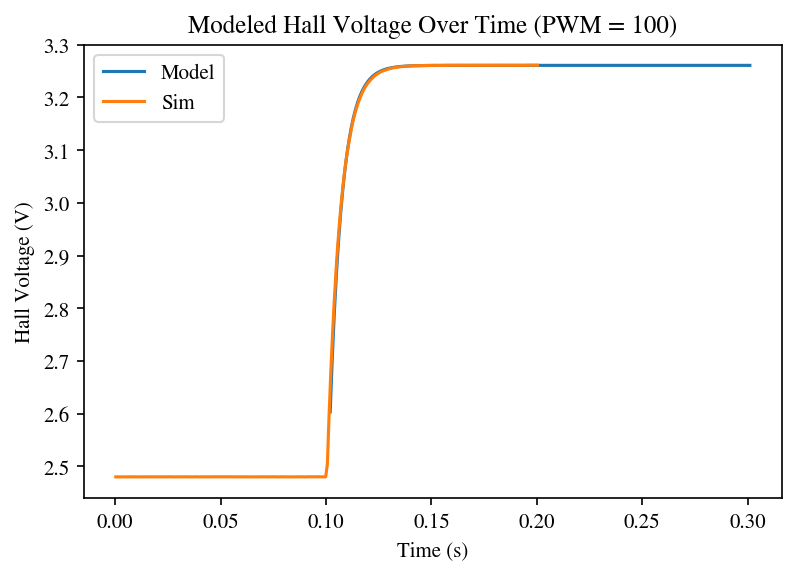

In [11]:
# NOTE: Run sys_3 for the data in this graph

model = MagLevModel()
model.testHallVoltageFromElectromagnet(end_t = 0.2, test_PWM = 100)

model.ts = np.array(model.ts)
model.V_hs = np.array(model.V_hs)

plt.plot(model.ts + 0.101, model.V_hs + V_h_list[0], label="Model")
plt.plot(time_list, V_h_list, label="Sim")
plt.title("Modeled Hall Voltage Over Time (PWM = 100)")
plt.ylabel("Hall Voltage (V)")
plt.xlabel("Time (s)")
plt.legend()